In [38]:
import numpy as np
import pandas
import pm4py
from pm4py.objects.conversion.heuristics_net import converter

In [2]:
log = pm4py.read_xes('../../data/BPI Challenge 2017.xes')

parsing log, completed traces ::   0%|          | 0/31509 [00:00<?, ?it/s]

In [30]:
merged_event_log = pandas.merge(log, log,
                                left_on=['case:concept:name', 'org:resource', 'concept:name'],
                                right_on=['case:concept:name', 'org:resource', 'concept:name'],
                                suffixes=('_start', '_complete'))
start_end_event_log = merged_event_log[(merged_event_log['lifecycle:transition_start'] == 'start') & (merged_event_log['lifecycle:transition_complete'] == 'complete')]
start_end_event_log.loc[:, 'duration'] = start_end_event_log['time:timestamp_complete'] - start_end_event_log['time:timestamp_start']
start_end_event_log.loc[:, 'duration_seconds'] =  (start_end_event_log['duration']).astype('timedelta64[s]').astype(int)
start_end_event_log = start_end_event_log[start_end_event_log['duration_seconds'] > 0]

/tmp/ipykernel_15104/2797220679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_end_event_log.loc[:, 'duration'] = start_end_event_log['time:timestamp_complete'] - start_end_event_log['time:timestamp_start']
/tmp/ipykernel_15104/2797220679.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_end_event_log.loc[:, 'duration_seconds'] =  (start_end_event_log['duration']).astype('timedelta64[s]').astype(int)


In [31]:
start_end_event_log

,Action_start,org:resource,concept:name,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:concept:name,...,NumberOfTerms_complete,Accepted_complete,MonthlyCost_complete,Selected_complete,CreditScore_complete,OfferedAmount_complete,OfferID_complete,start_timestamp_complete,duration,duration_seconds
158,Obtained,User_19,W_Complete application,Workflow,Workitem_62767814,start,2016-01-02 10:55:03.169000+00:00,Home improvement,New credit,Application_428409768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-02 11:06:53.291000+00:00,0 days 00:11:50.122000,710
246,Obtained,User_17,W_Handle leads,Workflow,Workitem_1237205341,start,2016-01-02 09:05:02.658000+00:00,Car,New credit,Application_1746793196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-02 09:06:04.201000+00:00,0 days 00:01:01.543000,61
507,Obtained,User_19,W_Complete application,Workflow,Workitem_1987035323,start,2016-01-02 11:32:57.796000+00:00,Home improvement,New credit,Application_828200680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-02 11:43:56.259000+00:00,0 days 00:10:58.463000,658
542,Obtained,User_17,W_Complete application,Workflow,Workitem_1299269231,start,2016-01-02 11:22:55.931000+00:00,Existing loan takeover,New credit,Application_1085880569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-02 11:45:11.179000+00:00,0 days 00:22:15.248000,1335
824,Obtained,User_19,W_Complete application,Workflow,Workitem_488414588,start,2016-01-02 14:26:27.976000+00:00,Car,New credit,Application_619403287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-02 14:44:54.610000+00:00,0 days 00:18:26.634000,1106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873477,Obtained,User_37,W_Complete application,Workflow,Workitem_690805293,start,2016-12-31 13:35:46.637000+00:00,Car,New credit,Application_1280325005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 13:40:24.458000+00:00,0 days 00:04:37.821000,277
2873733,Obtained,User_52,W_Complete application,Workflow,Workitem_1759805453,start,2016-12-31 14:40:38.702000+00:00,Unknown,Limit raise,Application_770397679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 14:45:27.375000+00:00,0 days 00:04:48.673000,288
2873793,Obtained,User_66,W_Handle leads,Workflow,Workitem_210386077,start,2017-01-02 07:01:22.462000+00:00,Car,New credit,Application_117342811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-02 07:02:06.787000+00:00,0 days 00:00:44.325000,44
2873839,Obtained,User_53,W_Validate application,Workflow,Workitem_1661538584,start,2017-01-11 14:23:08.405000+00:00,Car,New credit,Application_117342811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-11 14:26:39.529000+00:00,0 days 00:03:31.124000,211


In [5]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log, case_id_key='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp')

In [6]:
heu_net = pm4py.discover_heuristics_net(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

In [7]:
heu_net

{'A_Accepted': (node:A_Accepted connections:{O_Create Offer:[0.9999666299596223]}), 'O_Create Offer': (node:O_Create Offer connections:{O_Created:[0.834161636414052]}), 'A_Cancelled': (node:A_Cancelled connections:{O_Cancelled:[0.9999026384967384]}), 'O_Cancelled': (node:O_Cancelled connections:{O_Cancelled:[0.9997741133950757], O_Create Offer:[0.9985486211901307], W_Call after offers:[0.999896480331263], W_Call incomplete files:[0]}), 'A_Complete': (node:A_Complete connections:{W_Shortened completion :[0.9782608695652174], W_Call after offers:[0]}), 'W_Shortened completion ': (node:W_Shortened completion  connections:{A_Accepted:[0.9666666666666667], W_Shortened completion :[0.9914529914529915], W_Call after offers:[0], W_Complete application:[0]}), 'A_Concept': (node:A_Concept connections:{A_Accepted:[0.9998916811091855], W_Shortened completion :[0.9333333333333333], W_Complete application:[0]}), 'A_Create Application': (node:A_Create Application connections:{A_Concept:[0.99970501474

In [8]:
dfg = pm4py.algo.discovery.dfg.algorithm.apply(log,
                                              variant=pm4py.algo.discovery.dfg.algorithm.Variants.FREQUENCY)

In [9]:
dfg

{('A_Accepted', 'O_Create Offer'): 29966,
 ('A_Accepted', 'W_Complete application'): 1538,
 ('A_Accepted', 'W_Shortened completion '): 5,
 ('A_Cancelled', 'O_Cancelled'): 10270,
 ('A_Cancelled', 'W_Call after offers'): 103,
 ('A_Cancelled', 'W_Call incomplete files'): 41,
 ('A_Cancelled', 'W_Complete application'): 14,
 ('A_Cancelled', 'W_Validate application'): 3,
 ('A_Complete', 'A_Cancelled'): 57,
 ('A_Complete', 'A_Denied'): 15,
 ('A_Complete', 'O_Cancelled'): 287,
 ('A_Complete', 'O_Create Offer'): 521,
 ('A_Complete', 'O_Sent (mail and online)'): 39,
 ('A_Complete', 'O_Sent (online only)'): 2,
 ('A_Complete', 'W_Call after offers'): 30396,
 ('A_Complete', 'W_Shortened completion '): 45,
 ('A_Concept', 'A_Accepted'): 9231,
 ('A_Concept', 'W_Complete application'): 22264,
 ('A_Concept', 'W_Shortened completion '): 14,
 ('A_Create Application', 'A_Concept'): 3389,
 ('A_Create Application', 'A_Submitted'): 20423,
 ('A_Create Application', 'W_Complete application'): 7697,
 ('A_Denied'

In [10]:
dfg_old = pm4py.algo.discovery.dfg.algorithm.apply(log,
                                              variant=pm4py.algo.discovery.dfg.algorithm.Variants.FREQ_TRIPLES)

In [11]:
dfg_old

{('A_Create Application', 'A_Submitted', 'W_Handle leads'): 20423,
 ('A_Submitted', 'W_Handle leads', 'W_Handle leads'): 20423,
 ('W_Handle leads', 'W_Handle leads', 'W_Complete application'): 20423,
 ('W_Handle leads', 'W_Complete application', 'A_Concept'): 16997,
 ('W_Complete application', 'A_Concept', 'W_Complete application'): 18875,
 ('A_Concept', 'W_Complete application', 'W_Complete application'): 16477,
 ('W_Complete application', 'W_Complete application', 'A_Accepted'): 16481,
 ('W_Complete application', 'A_Accepted', 'O_Create Offer'): 21098,
 ('A_Accepted', 'O_Create Offer', 'O_Created'): 29966,
 ('O_Create Offer', 'O_Created', 'O_Sent (mail and online)'): 35604,
 ('O_Created', 'O_Sent (mail and online)', 'W_Complete application'): 27500,
 ('O_Sent (mail and online)',
  'W_Complete application',
  'W_Call after offers'): 30912,
 ('W_Complete application',
  'W_Call after offers',
  'W_Call after offers'): 31362,
 ('W_Call after offers', 'W_Call after offers', 'A_Complete')

In [12]:
dfg_perf = pm4py.algo.discovery.dfg.algorithm.apply(log,
                                              variant=pm4py.algo.discovery.dfg.algorithm.Variants.PERFORMANCE)

In [13]:
dfg_perf

{('A_Accepted', 'O_Create Offer'): 767.1081360541948,
 ('A_Accepted', 'W_Complete application'): 18964.491843302992,
 ('A_Accepted', 'W_Shortened completion '): 194.028,
 ('A_Cancelled', 'O_Cancelled'): 0.04252775073028237,
 ('A_Cancelled', 'W_Call after offers'): 0.05735922330097087,
 ('A_Cancelled', 'W_Call incomplete files'): 0.07551219512195122,
 ('A_Cancelled', 'W_Complete application'): 0.03928571428571428,
 ('A_Cancelled', 'W_Validate application'): 0.056999999999999995,
 ('A_Complete', 'A_Cancelled'): 428.88492982456137,
 ('A_Complete', 'A_Denied'): 512.3218666666667,
 ('A_Complete', 'O_Cancelled'): 136.23529268292683,
 ('A_Complete', 'O_Create Offer'): 152.53523992322457,
 ('A_Complete', 'O_Sent (mail and online)'): 38.77607692307692,
 ('A_Complete', 'O_Sent (online only)'): 50.791000000000004,
 ('A_Complete', 'W_Call after offers'): 488.4642073628109,
 ('A_Complete', 'W_Shortened completion '): 113.8926888888889,
 ('A_Concept', 'A_Accepted'): 18382.070726790163,
 ('A_Concept'

In [14]:
dfg_case = pm4py.algo.discovery.dfg.algorithm.apply(log,
                                              variant=pm4py.algo.discovery.dfg.algorithm.Variants.CASE_ATTRIBUTES)

In [15]:
dfg_case

{('A_Accepted', 'O_Create Offer'): 29966,
 ('A_Accepted', 'W_Complete application'): 1538,
 ('A_Accepted', 'W_Shortened completion '): 5,
 ('A_Cancelled', 'O_Cancelled'): 10270,
 ('A_Cancelled', 'W_Call after offers'): 103,
 ('A_Cancelled', 'W_Call incomplete files'): 41,
 ('A_Cancelled', 'W_Complete application'): 14,
 ('A_Cancelled', 'W_Validate application'): 3,
 ('A_Complete', 'A_Cancelled'): 57,
 ('A_Complete', 'A_Denied'): 15,
 ('A_Complete', 'O_Cancelled'): 287,
 ('A_Complete', 'O_Create Offer'): 521,
 ('A_Complete', 'O_Sent (mail and online)'): 39,
 ('A_Complete', 'O_Sent (online only)'): 2,
 ('A_Complete', 'W_Call after offers'): 30396,
 ('A_Complete', 'W_Shortened completion '): 45,
 ('A_Concept', 'A_Accepted'): 9231,
 ('A_Concept', 'W_Complete application'): 22264,
 ('A_Concept', 'W_Shortened completion '): 14,
 ('A_Create Application', 'A_Concept'): 3389,
 ('A_Create Application', 'A_Submitted'): 20423,
 ('A_Create Application', 'W_Complete application'): 7697,
 ('A_Denied'

In [16]:
dfg_native = pm4py.algo.discovery.dfg.algorithm.apply(log,
                                              variant=pm4py.algo.discovery.dfg.algorithm.Variants.NATIVE)

In [17]:
dfg_native

{('A_Accepted', 'O_Create Offer'): 29966,
 ('A_Accepted', 'W_Complete application'): 1538,
 ('A_Accepted', 'W_Shortened completion '): 5,
 ('A_Cancelled', 'O_Cancelled'): 10270,
 ('A_Cancelled', 'W_Call after offers'): 103,
 ('A_Cancelled', 'W_Call incomplete files'): 41,
 ('A_Cancelled', 'W_Complete application'): 14,
 ('A_Cancelled', 'W_Validate application'): 3,
 ('A_Complete', 'A_Cancelled'): 57,
 ('A_Complete', 'A_Denied'): 15,
 ('A_Complete', 'O_Cancelled'): 287,
 ('A_Complete', 'O_Create Offer'): 521,
 ('A_Complete', 'O_Sent (mail and online)'): 39,
 ('A_Complete', 'O_Sent (online only)'): 2,
 ('A_Complete', 'W_Call after offers'): 30396,
 ('A_Complete', 'W_Shortened completion '): 45,
 ('A_Concept', 'A_Accepted'): 9231,
 ('A_Concept', 'W_Complete application'): 22264,
 ('A_Concept', 'W_Shortened completion '): 14,
 ('A_Create Application', 'A_Concept'): 3389,
 ('A_Create Application', 'A_Submitted'): 20423,
 ('A_Create Application', 'W_Complete application'): 7697,
 ('A_Denied'

In [18]:
pn = converter.apply(heu_net)
pn

(places: [ intplace_A_Complete, intplace_A_Concept, intplace_A_Create Application, intplace_A_Denied, intplace_A_Validating, intplace_O_Cancelled, intplace_O_Created, intplace_O_Refused, intplace_O_Returned, intplace_O_Sent (mail and online), intplace_O_Sent (online only), intplace_W_Assess potential fraud, intplace_W_Call after offers, intplace_W_Call incomplete files, intplace_W_Complete application, intplace_W_Handle leads, intplace_W_Personal Loan collection, intplace_W_Shortened completion , intplace_W_Validate application, pre_A_Accepted, pre_A_Cancelled, pre_A_Concept, pre_A_Pending, pre_O_Cancelled, pre_O_Create Offer, pre_O_Created, pre_O_Returned, pre_W_Call after offers, pre_W_Call incomplete files, pre_W_Complete application, pre_W_Handle leads, pre_W_Personal Loan collection, pre_W_Shortened completion , pre_W_Validate application, sink0, source0, splace_in_O_Cancelled_A_Cancelled_0, splace_in_O_Cancelled_O_Cancelled_0, splace_in_O_Refused_O_Refused_0, splace_in_O_Sent (ma

In [19]:
pn[0].__dict__.keys()

dict_keys(['_PetriNet__name', '_PetriNet__places', '_PetriNet__transitions', '_PetriNet__arcs', '_PetriNet__properties'])

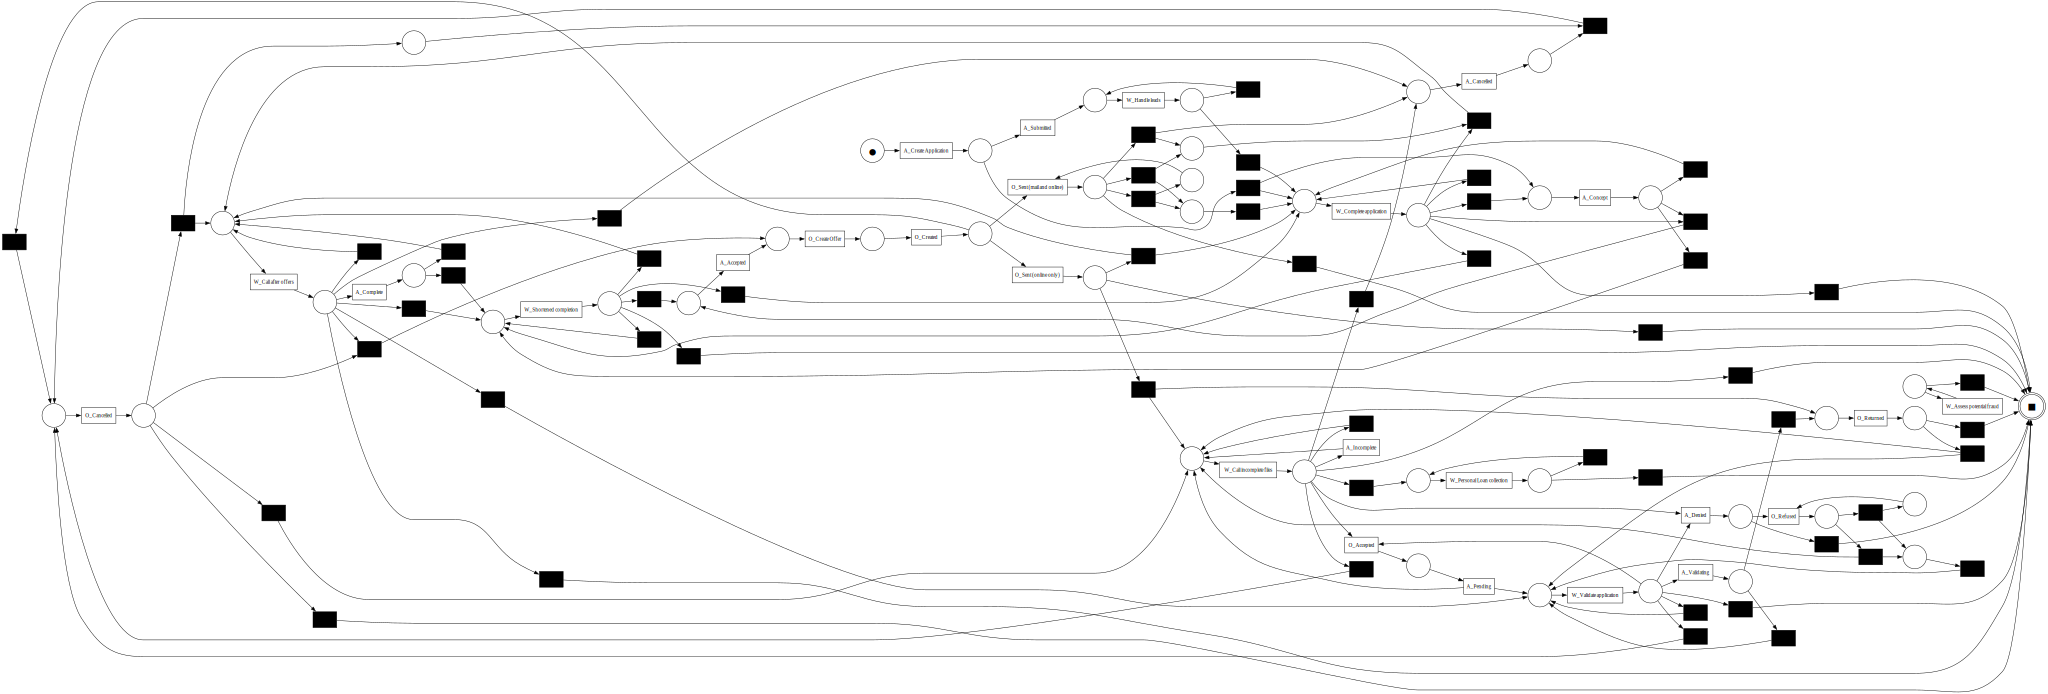

In [20]:
pm4py.visualization.petri_net.visualizer.apply(*pn)

In [21]:
bpmn = pm4py.convert.convert_to_bpmn(*pn)

In [52]:
print(list(dfg_perf.items())[0][0], list(dfg_perf.items())[0][1], [np.random.exponential(list(dfg_perf.items())[0][1]) for i in range(10)])

('A_Accepted', 'O_Create Offer') 767.1081360541948 [183.41365200083118, 439.60524089650175, 229.82665207187574, 817.4340636140416, 79.91127088068278, 312.1494017649662, 104.9498201680456, 436.1331002363064, 729.0226488066656, 1920.8895934151394]


In [23]:
traces = pm4py.algo.simulation.playout.dfg.variants.performance.apply(dfg_native, start_activities, end_activities,
                                                                     parameters = {
                                                                         pm4py.algo.simulation.playout.dfg.variants.performance.Parameters.PERFORMANCE_DFG : dfg_perf,
                                                                         pm4py.algo.simulation.playout.dfg.variants.performance.Parameters.NUM_TRACES : 10000
                                                                     })

In [57]:
traces[0].attributes

{'concept:name': '0'}

In [25]:
pm4py.get_all_case_durations(log)

[201.062,
 215.773,
 281.698,
 345.968,
 371.213,
 395.214,
 411.934,
 424.66,
 449.348,
 449.637,
 455.44,
 469.942,
 472.778,
 484.693,
 485.167,
 494.298,
 501.501,
 517.736,
 545.382,
 570.797,
 600.925,
 625.224,
 628.515,
 641.545,
 646.106,
 656.387,
 670.557,
 681.286,
 714.233,
 715.626,
 732.586,
 743.4,
 804.515,
 851.86,
 890.64,
 898.464,
 906.363,
 907.882,
 915.73,
 937.728,
 950.924,
 968.592,
 984.645,
 997.345,
 1002.427,
 1054.549,
 1063.588,
 1092.503,
 1174.734,
 1203.872,
 1283.056,
 1338.957,
 1419.99,
 1420.411,
 1508.367,
 1544.38,
 1578.063,
 1657.033,
 1757.802,
 1820.206,
 1835.427,
 1964.747,
 2126.879,
 2142.132,
 2143.124,
 2210.141,
 2232.558,
 2234.972,
 2290.791,
 2308.24,
 2490.916,
 2495.841,
 2592.599,
 2599.4,
 2708.542,
 2790.994,
 2942.291,
 3089.693,
 3099.075,
 3154.377,
 3175.531,
 3219.386,
 3389.773,
 3479.282,
 3516.884,
 3611.197,
 3737.307,
 3947.838,
 3954.672,
 4062.043,
 4141.568,
 4304.556,
 4308.819,
 4937.663,
 5134.046,
 5277.16,
 

In [26]:
pm4py.get_all_case_durations(traces)

[0.0026900004595518112,
 0.0034720003604888916,
 0.0036859996616840363,
 0.005271000787615776,
 0.005706999450922012,
 0.007530000060796738,
 0.009376000612974167,
 0.01054299995303154,
 0.012334000319242477,
 0.013465000316500664,
 0.013645999133586884,
 0.0147280003875494,
 0.01654299907386303,
 0.023200999945402145,
 0.023545999079942703,
 0.024041999131441116,
 0.027323000133037567,
 0.027490999549627304,
 0.033601999282836914,
 0.03690999932587147,
 0.03841499984264374,
 0.038892000913619995,
 0.04182199947535992,
 0.05058000050485134,
 0.08033699914813042,
 0.11901200003921986,
 0.15529599972069263,
 0.16492299921810627,
 0.18368900008499622,
 0.2552760001271963,
 0.2784620001912117,
 0.36362200044095516,
 0.36678799986839294,
 0.3677639998495579,
 0.39218199998140335,
 0.41060500033199787,
 0.4712409991770983,
 0.479118999093771,
 0.5510980002582073,
 0.5888909995555878,
 0.5905840005725622,
 0.6019960008561611,
 0.635428000241518,
 0.6463339999318123,
 0.6507360003888607,
 0.68

In [32]:
start_end_event_log

,Action_start,org:resource,concept:name,EventOrigin_start,EventID_start,lifecycle:transition_start,time:timestamp_start,case:LoanGoal_start,case:ApplicationType_start,case:concept:name,...,NumberOfTerms_complete,Accepted_complete,MonthlyCost_complete,Selected_complete,CreditScore_complete,OfferedAmount_complete,OfferID_complete,start_timestamp_complete,duration,duration_seconds
158,Obtained,User_19,W_Complete application,Workflow,Workitem_62767814,start,2016-01-02 10:55:03.169000+00:00,Home improvement,New credit,Application_428409768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-02 11:06:53.291000+00:00,0 days 00:11:50.122000,710
246,Obtained,User_17,W_Handle leads,Workflow,Workitem_1237205341,start,2016-01-02 09:05:02.658000+00:00,Car,New credit,Application_1746793196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-02 09:06:04.201000+00:00,0 days 00:01:01.543000,61
507,Obtained,User_19,W_Complete application,Workflow,Workitem_1987035323,start,2016-01-02 11:32:57.796000+00:00,Home improvement,New credit,Application_828200680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-02 11:43:56.259000+00:00,0 days 00:10:58.463000,658
542,Obtained,User_17,W_Complete application,Workflow,Workitem_1299269231,start,2016-01-02 11:22:55.931000+00:00,Existing loan takeover,New credit,Application_1085880569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-02 11:45:11.179000+00:00,0 days 00:22:15.248000,1335
824,Obtained,User_19,W_Complete application,Workflow,Workitem_488414588,start,2016-01-02 14:26:27.976000+00:00,Car,New credit,Application_619403287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-02 14:44:54.610000+00:00,0 days 00:18:26.634000,1106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873477,Obtained,User_37,W_Complete application,Workflow,Workitem_690805293,start,2016-12-31 13:35:46.637000+00:00,Car,New credit,Application_1280325005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 13:40:24.458000+00:00,0 days 00:04:37.821000,277
2873733,Obtained,User_52,W_Complete application,Workflow,Workitem_1759805453,start,2016-12-31 14:40:38.702000+00:00,Unknown,Limit raise,Application_770397679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 14:45:27.375000+00:00,0 days 00:04:48.673000,288
2873793,Obtained,User_66,W_Handle leads,Workflow,Workitem_210386077,start,2017-01-02 07:01:22.462000+00:00,Car,New credit,Application_117342811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-02 07:02:06.787000+00:00,0 days 00:00:44.325000,44
2873839,Obtained,User_53,W_Validate application,Workflow,Workitem_1661538584,start,2017-01-11 14:23:08.405000+00:00,Car,New credit,Application_117342811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-11 14:26:39.529000+00:00,0 days 00:03:31.124000,211


In [42]:
np.mean(start_end_event_log[start_end_event_log['concept:name'] == 'W_Complete application']['duration_seconds'])

2358.7728389546573

In [35]:
from pm4py.statistics.sojourn_time import log as pm4py_log
pm4py_log.get.apply(start_end_event_log, parameters={
    pm4py_log.get.Parameters.TIMESTAMP_KEY: "start_timestamp_complete",
    pm4py_log.get.Parameters.START_TIMESTAMP_KEY: "time:timestamp_start"}
)

{'W_Complete application': 2359.269882658554,
 'W_Handle leads': 291.4894597218958,
 'W_Call incomplete files': 97908.3596609761,
 'W_Validate application': 40589.12652100621,
 'W_Call after offers': 32763.99003402311,
 'W_Assess potential fraud': 54778.58502739423}

In [ ]:
per